In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Metadata saved to output plots
METADATA = {
    "Contributor": "Alexander Gude",
    "Rights": "CC-BY-SA 4.0"
}

In [3]:
# Show plots inline
%matplotlib inline

# Helper functions

In [4]:
# We should be able to just set rcParams, expect Jupyter has a bug:
# https://github.com/jupyter/notebook/issues/3385
#
# So we have to call this function every time we want to plot.

def setup_plot(title=None, xlabel=None, ylabel=None):
    """Set up a simple, single pane plot with custom configuration.
    
    Args:
        title (str, optional): The title of the plot.
        xlabel (str, optional): The xlabel of the plot.
        ylabel (str, optional): The ylabel of the plot.
        
    Returns:
        (fig, ax): A Matplotlib figure and axis object.
        
    """
    # Plot Size
    plt.rcParams["figure.figsize"] = (12, 7)  # (Width, height)
    
    # Text Size
    SMALL = 12
    MEDIUM = 16
    LARGE = 20
    HUGE = 28
    plt.rcParams["axes.titlesize"] = HUGE
    plt.rcParams["figure.titlesize"] = HUGE
    plt.rcParams["axes.labelsize"] = LARGE
    plt.rcParams["legend.fontsize"] = LARGE
    plt.rcParams["xtick.labelsize"] = MEDIUM
    plt.rcParams["ytick.labelsize"] = MEDIUM
    plt.rcParams["font.size"] = SMALL
    
    # Legend
    plt.rcParams["legend.frameon"] = True
    plt.rcParams["legend.framealpha"] = 1
    plt.rcParams["legend.facecolor"] = "white"
    plt.rcParams["legend.edgecolor"] = "black"
    
    # Figure output
    plt.rcParams["savefig.dpi"] = 300
    
    # Make the plol
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    return fig, ax

In [5]:
def draw_bands(ax, color="0.95", alpha=1.0):
    """Add grey bands between x-axis ticks.

    Args:
        ax (matplotlib axis): The axis to draw on.
        color (matplotlib color, default "0.95"): An object that 
            matplotlib understands as a color, used to set the 
            color of the bands.
        alpha (float, default 1.0): A float that controls the 
            transparency of the bands. 1 is opague and 0 is
            completely transparent.
        
    """
    ticks = ax.get_xticks(minor=False)
    x_min, x_max = ax.get_xlim()

    lefts = []
    rights = []
    # There is a more elegant way to do this, but it assumes there is always a
    # tick outside the plot range on the left and right. It seems to be true,
    # but I don't think it is guarnteed.
    for left, right in zip(ticks[:-1], ticks[1:]):
        # Sometimes the ticks are outside the plot, so keep going until we 
        # find one inside the plot. Then end when we find a ticket off the 
        # right side.
        if left < x_min:
            continue
        elif x_max < left:
            break
        # The tick on the left (which starts the band) can't also be a 
        # right tick (which ends a band). Otherwise we would have two
        # bands next to eachother.
        elif left in rights:
            continue
     
        lefts.append(left)
        rights.append(right)
            
    for (left, right) in zip(lefts, rights):
        ax.axvspan(left, right, color=color, alpha=alpha, zorder=-2)
    
    # Reset the x range so that we do not have a weird empty area on the right
    # side if we have to add one last band.
    ax.set_xlim((x_min, x_max))

In [6]:
def draw_colored_legend(ax):
    """Draw a legend for the plot with the text colored to match the points.
    
    Args:
        ax (matplotlib axis): The axis to draw on.
    
    """
    # Draw a legend where there is no space around the line/point so
    # that the text is in the right place when we turn off the line/point.
    legend = ax.legend(handlelength=0, handletextpad=0)
        
    handles = legend.legendHandles
    texts = legend.get_texts()
    for handle, text in zip(handles, texts):
        # Change the color of the text to match the line or points
        color = handle.get_facecolor()[0]
        text.set_color(color)
        
        # Turn off the point
        handle.set_visible(False)

In [7]:
def save_plot(fig, filename):
    """Save the plot with metadata and tight layout.
    
    Args:
        fig (matplotlib figure): The figure to save.
        filename (str): The loction to save the file to.
    
    """
    metadata = METADATA
    
    fig.savefig(
        fname=f"{filename}", 
        bbox_inches="tight",
        metadata=metadata,
    ) 

# Plots

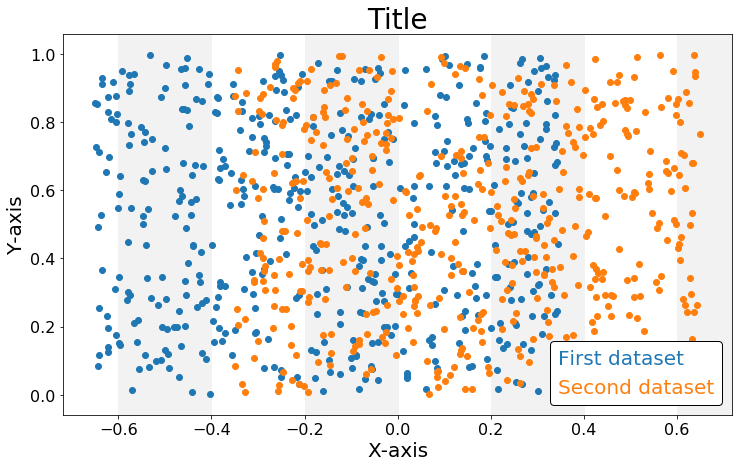

In [8]:
# Plotting
fig, ax = setup_plot(
    title="Title",
    xlabel="X-axis",
    ylabel="Y-axis",
)

ax.scatter(np.random.rand(500)-0.65, np.random.rand(500), label="First dataset")
ax.scatter(np.random.rand(500)-0.35, np.random.rand(500), label="Second dataset")

draw_colored_legend(ax)

draw_bands(ax)

save_plot(fig, "/tmp/output.svg")